In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [ ]:
df.columns=["target","text"]
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df["target"]= df["target"].replace(["ham"],0)
df["target"]= df["target"].replace(["spam"],1)

In [ ]:
df["target"].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

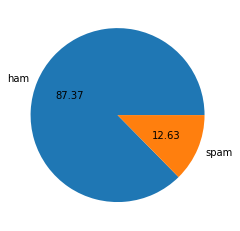

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)
df["num_characters"]

<ipython-input-17-1edf949068f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [ ]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

<ipython-input-19-0f1001ee289f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

<ipython-input-20-f018ab303b5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


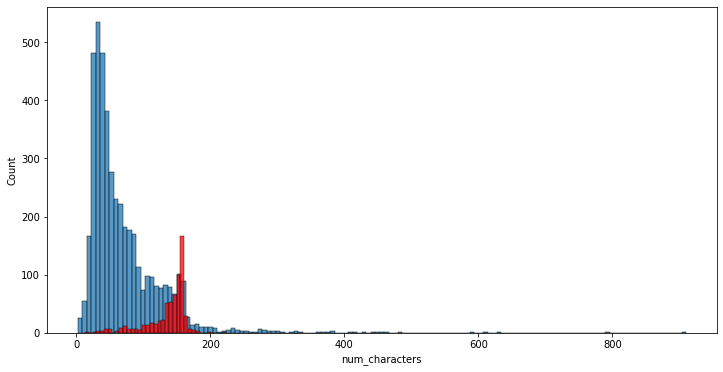

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


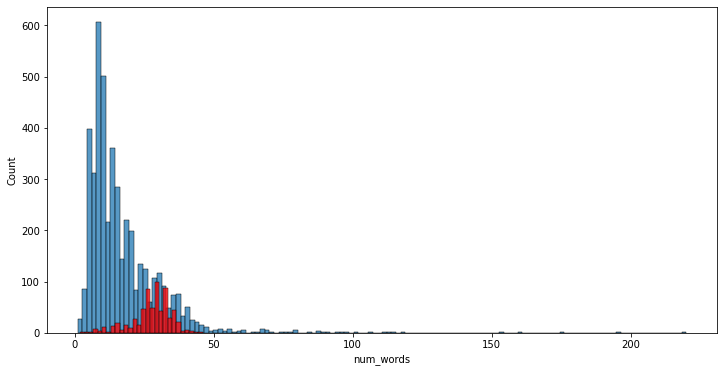

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

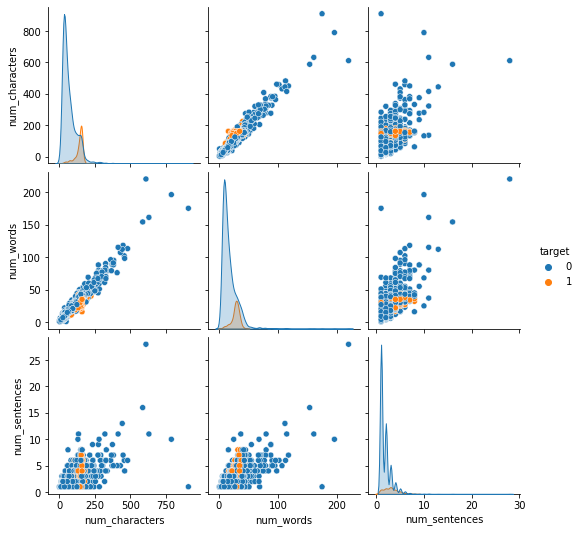

In [ ]:
sns.pairplot(df,hue='target')

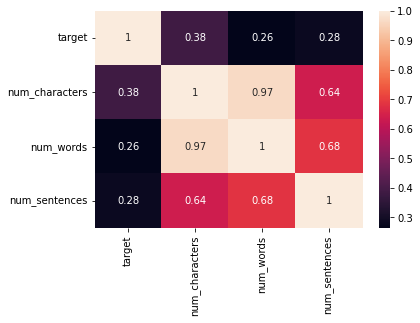

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
       if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
                
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
       
    return " ".join(y)

In [ ]:
transform_text("Hello, ... ??? ali veli asdasdasdas sdfsdds ? ?")

'hello ali veli asdasdasda sdfsdd'

In [ ]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

<ipython-input-36-3412e92ec83f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
transform_text("Hi, LovE How ARE YoU")

'hi love'

In [ ]:
transform_text(df["text"][1])

'ok lar joke wif u oni'

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


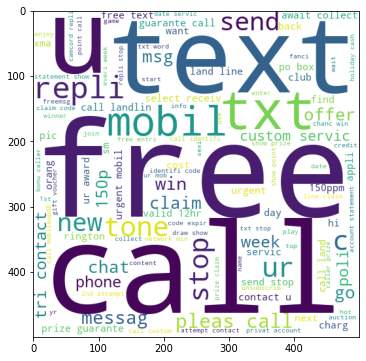

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

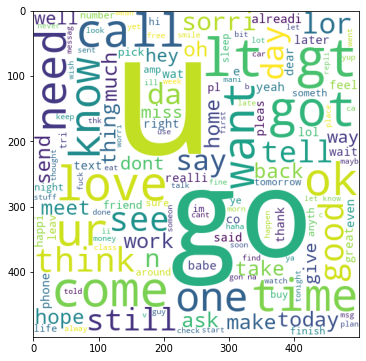

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
#df["target"] deyince aynı adrese attığından benzer işlem yapıyor

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


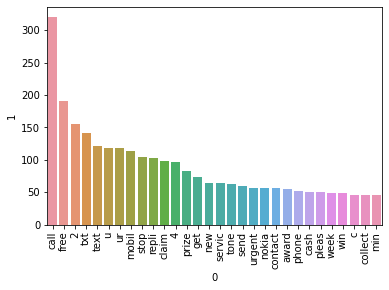

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35394

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


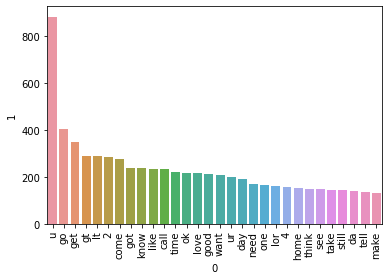

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
Y= df["target"].values

In [ ]:
X.shape 

(5169, 6708)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=45)

In [ ]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
Ypred1 = gnb.predict(Xtest)
print(accuracy_score(Ytest,Ypred1))
print(confusion_matrix(Ytest,Ypred1))

0.8771760154738878
[[799 112]
 [ 15 108]]


In [ ]:
mnb = MultinomialNB()
mnb.fit(Xtrain,Ytrain)
Ypred2 = mnb.predict(Xtest)
print(accuracy_score(Ytest,Ypred2))
print(confusion_matrix(Ytest,Ypred2))

0.9787234042553191
[[898  13]
 [  9 114]]


In [ ]:
bnb = BernoulliNB()
bnb.fit(Xtrain,Ytrain)
Ypred3 = bnb.predict(Xtest)
print(accuracy_score(Ytest,Ypred3))
print(confusion_matrix(Ytest,Ypred3))
#906 ham data, 102 spam data

0.9748549323017408
[[906   5]
 [ 21 102]]


In [ ]:
k=stopwords.words('english')
k.append("u")
"u" in k

True

In [ ]:
"u" in stopwords.words('english')

False

In [ ]:
k="trader"
ps.stem(k)

'trader'

In [ ]:
transform_text(df["text"][5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

In [ ]:
df['transformed_num_characters'] = df['transformed_text'].apply(len)
df['transformed_num_words'] = df['transformed_text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['transformed_num_sentences'] = df['transformed_text'].apply(lambda x:len(nltk.sent_tokenize(x)))


<ipython-input-59-384caec50c65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_num_characters'] = df['transformed_text'].apply(len)
<ipython-input-59-384caec50c65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_num_words'] = df['transformed_text'].apply(lambda x:len(nltk.word_tokenize(x)))
<ipython-input-59-384caec50c65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text,transformed_num_characters,transformed_num_words,transformed_num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,76,16,1
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,21,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,127,24,1
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,35,9,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,36,7,1


In [ ]:
df['between_num_characters']=df['num_characters']-df['transformed_num_characters']
df['between_num_words']=df['num_words']-df['transformed_num_words']
df['between_num_sentences']=df['num_sentences']-df['transformed_num_sentences']
df.head()

<ipython-input-61-ef935f3b2f08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['between_num_characters']=df['num_characters']-df['transformed_num_characters']
<ipython-input-61-ef935f3b2f08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['between_num_words']=df['num_words']-df['transformed_num_words']
<ipython-input-61-ef935f3b2f08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,target,text,num_characters,num_words,num_sentences,transformed_text,transformed_num_characters,transformed_num_words,transformed_num_sentences,between_num_characters,between_num_words,between_num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,76,16,1,35,8,1
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,21,6,1,8,2,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,127,24,1,28,13,1
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,35,9,1,14,4,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,36,7,1,25,8,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=45)

In [ ]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
Ypred1 = gnb.predict(Xtest)
print(accuracy_score(Ytest,Ypred1))
print(confusion_matrix(Ytest,Ypred1))

0.8752417794970987
[[799 112]
 [ 17 106]]


In [ ]:
mnb = MultinomialNB()
mnb.fit(Xtrain,Ytrain)
Ypred2 = mnb.predict(Xtest)
print(accuracy_score(Ytest,Ypred2))
print(confusion_matrix(Ytest,Ypred2))

0.9758220502901354
[[910   1]
 [ 24  99]]


In [ ]:
bnb = BernoulliNB()
bnb.fit(Xtrain,Ytrain)
Ypred3 = bnb.predict(Xtest)
print(accuracy_score(Ytest,Ypred3))
print(confusion_matrix(Ytest,Ypred3))

0.9816247582205029
[[908   3]
 [ 16 107]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()

In [ ]:
clfs = {
    'KNN' : knn, 
    'DT': dtc, 
    'LR': lr, 
    'RF': rf, 
    'AB': adb, 
    'BG': bc, 
    'EXT': etc,
    'GB':gb,
    'XGB':xgb
}

In [ ]:
def train_classifier(clf,Xtrain,Ytrain,Xtest,Ytest):
    clf.fit(Xtrain,Ytrain)
    Ypred = clf.predict(Xtest)
    accuracy = accuracy_score(Ytest,Ypred)
    precision = precision_score(Ytest,Ypred)
    
    return accuracy

In [ ]:
k= train_classifier(knn,Xtrain,Ytrain,Xtest,Ytest)
k

0.913926499032882

In [ ]:
accuracy_scores = []

for key,clf in clfs.items():
    
    current_accuracy= train_classifier(clf, Xtrain,Ytrain,Xtest,Ytest)
    
    print("For ",key)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  KNN
Accuracy -  0.913926499032882
For  DT
Accuracy -  0.9477756286266924
For  LR
Accuracy -  0.9593810444874274
For  RF
Accuracy -  0.9700193423597679
For  AB
Accuracy -  0.9709864603481625
For  BG
Accuracy -  0.9555125725338491
For  EXT
Accuracy -  0.9777562862669246
For  GB
Accuracy -  0.9642166344294004
For  XGB
Accuracy -  0.9613152804642167


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy
6,EXT,0.977756
4,AB,0.970986
3,RF,0.970019
7,GB,0.964217
8,XGB,0.961315
2,LR,0.959381
5,BG,0.955513
1,DT,0.947776
0,KNN,0.913926


In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(probability=True)
ab = AdaBoostClassifier()
knn=KNeighborsClassifier()
voting = VotingClassifier(estimators=[('svm', svc), ('ab', ab), ('knn', knn)],voting='soft')
voting.fit(Xtrain,Ytrain)
Ypred = voting.predict(Xtest)
print("Accuracy",accuracy_score(Ytest,Ypred))


Accuracy 0.9738878143133463


In [ ]:
import pickle
pickle.dump(tfidf,open('C:/Users/Eda/Desktop/tfidf_vec.pkl','wb'))
pickle.dump(rf,open('C:/Users/Eda/Desktop/model.pkl','wb'))